In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
import matplotlib.pyplot as plt
from PIL import Image

C:\Users\Alex\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Alex\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Alex\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Alex\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
plt.imshow(x_train[0], cmap='Greys')

In [5]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [10]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 800)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 800)               3200      
_________________________________________________________________
dense_7 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=8, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 8s 159us/sample - loss: 0.2302 - acc: 0.9302 - val_loss: 0.1107 - val_acc: 0.9668

In [15]:
model.save_weights('model_mnist.h5')

In [16]:
model1 = Sequential()
model1.add(Dense(800, input_dim=784, activation='relu'))
model1.add(Dense(400, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', categorical_accuracy])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________


In [17]:
model1.load_weights('model_mnist.h5')

In [20]:
mw1 = model1.get_weights()

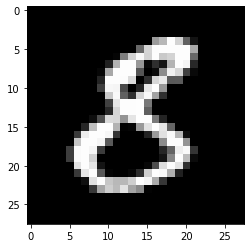

[[2.4341716e-14 3.0028186e-08 1.4573213e-07 7.7782124e-07 2.6146498e-14
  3.1029154e-07 1.4495744e-05 3.4122038e-13 9.9998426e-01 1.4441974e-14]]
8

[[3.4532710e-24 5.3279768e-19 1.9020662e-22 1.0951652e-13 2.3433739e-25
  1.0000000e+00 3.1598800e-18 1.7210840e-21 5.6723658e-13 6.1410848e-17]]
5

[[1.8912066e-11 9.9999833e-01 9.1217291e-11 1.5290896e-09 2.6186711e-09
  9.4693675e-08 1.2084657e-09 1.4708597e-08 1.6034560e-06 1.4490666e-09]]
1

[[2.2147665e-15 1.3700996e-09 1.0000000e+00 3.3529769e-11 1.4217818e-20
  2.7822637e-17 1.2257567e-18 3.4428515e-14 2.0092089e-14 3.1795480e-21]]
2

[[2.4371601e-12 9.9999905e-01 5.8969518e-12 6.3774723e-13 1.1989021e-09
  1.4308154e-12 1.4690558e-11 1.8049604e-08 9.6836641e-07 1.7010615e-12]]
1

[[1.65049518e-23 8.62103527e-15 1.03494696e-17 9.99999881e-01
  1.65972415e-25 1.63299660e-07 7.44607247e-22 2.59741097e-19
  9.33500823e-16 1.15421064e-16]]
3



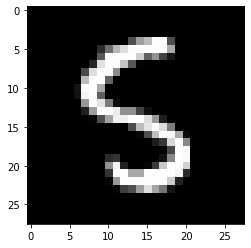

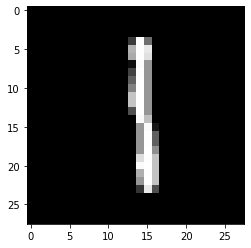

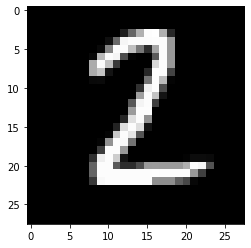

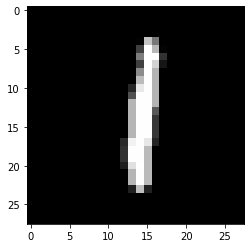

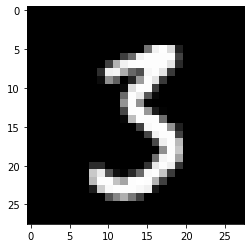

In [39]:
for i in range(1234, 1240):
    n_rec = i
    plt.imshow(Image.fromarray(x_test[n_rec]).convert('RGBA'))
    plt.show()

    x = np.expand_dims(X_test[n_rec],(0))
    pred = model1.predict(x)
    print(pred)

    print(np.argmax(pred))
    print()

In [45]:
for i in range(1234, 1240):
    n_rec = i

    x = np.expand_dims(X_test[n_rec], 0)
    pred = model1.predict(x)

    print(np.argmax(pred), '    ', np.argmax(y_test[n_rec]))
    print(pred)
    print(round(pred[0][np.argmax(pred)],2))

    print()

8      8
[[2.4341716e-14 3.0028186e-08 1.4573213e-07 7.7782124e-07 2.6146498e-14
  3.1029154e-07 1.4495744e-05 3.4122038e-13 9.9998426e-01 1.4441974e-14]]
1.0

5      5
[[3.4532710e-24 5.3279768e-19 1.9020662e-22 1.0951652e-13 2.3433739e-25
  1.0000000e+00 3.1598800e-18 1.7210840e-21 5.6723658e-13 6.1410848e-17]]
1.0

1      1
[[1.8912066e-11 9.9999833e-01 9.1217291e-11 1.5290896e-09 2.6186711e-09
  9.4693675e-08 1.2084657e-09 1.4708597e-08 1.6034560e-06 1.4490666e-09]]
1.0

2      2
[[2.2147665e-15 1.3700996e-09 1.0000000e+00 3.3529769e-11 1.4217818e-20
  2.7822637e-17 1.2257567e-18 3.4428515e-14 2.0092089e-14 3.1795480e-21]]
1.0

1      1
[[2.4371601e-12 9.9999905e-01 5.8969518e-12 6.3774723e-13 1.1989021e-09
  1.4308154e-12 1.4690558e-11 1.8049604e-08 9.6836641e-07 1.7010615e-12]]
1.0

3      3
[[1.65049518e-23 8.62103527e-15 1.03494696e-17 9.99999881e-01
  1.65972415e-25 1.63299660e-07 7.44607247e-22 2.59741097e-19
  9.33500823e-16 1.15421064e-16]]
1.0



In [52]:
y1 = image.load_img('2.png', color_mode='grayscale')
y = image.img_to_array(y1)
y1

In [55]:
image.array_to_img(np.absolute(y-255))

In [56]:
y = np.absolute(y-255)

In [57]:
y = y.reshape(1, -1)
y.shape

(1, 784)

In [65]:
x1 = image.load_img('6.png', color_mode='grayscale')
x = image.img_to_array(x1).reshape(1, -1)
x = np.absolute(x - 255) / 255

pred = model1.predict(x)
print(np.argmax(pred))
print(pred)
print(round(pred[0][np.argmax(pred)],5))
x1

6
[[1.0057210e-01 2.4714467e-07 1.8090107e-04 3.6041445e-06 3.2525462e-05
  3.9912626e-02 7.8854120e-01 2.2296435e-06 1.2537191e-02 5.8217380e-02]]
0.78854


In [101]:
x1 = image.load_img('31.png', color_mode='grayscale')
x1

In [102]:
x = image.img_to_array(x1)
x2 = x[:,:,0]

In [107]:
x = image.img_to_array(x1)
x3 = x.ravel()
# x3[x3>100]=255
x3 = x3.reshape(1, -1)

x3 = 1 - x3 / 255

pred = model1.predict(x3)
print(np.argmax(pred))
print(pred)
print(round(pred[0][np.argmax(pred)],5))

3
[[9.8579490e-05 1.2463077e-03 3.6079052e-03 7.9102147e-01 3.6195272e-10
  2.0188673e-01 1.8279450e-03 2.7656424e-04 3.3214543e-05 1.2838307e-06]]
0.79102


In [81]:
x3 = x.ravel()
x3[x3>135]=255
x3 = x3.reshape(28,28)

In [89]:
x1

In [108]:
# импорт модуля os
import os

# определяем текущий каталог и печатаем
path = os.getcwd()
print ("Текущая рабочая директория %s" % path)

Текущая рабочая директория E:\Projects\ML\TutorialsML\UII


In [ ]:

os.mkdir(path)

In [112]:
import os
with open(f'c:\Dirs.txt', 'r', encoding='utf-8') as f:
    text = f.readlines()

ls = [t.strip()[:-1] for t in text]
[os.mkdir(path) for path in ls]